In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 주어진 데이터 그대로 결정나무 실행해보기

In [2]:
df_fin = pd.read_csv("./data/2019가계부채/data_fin.csv", engine='python')
df_fin

,Unnamed: 0,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,0,4000.0,0,0.0,4000,0,0.0,0,0.0,4000.0,...,0,0,0,0,1,1,0,1,0,1
1,1,10000.0,10000,0.0,0,0,0.0,0,0.0,10000.0,...,0,0,0,0,0,1,1,1,0,0
2,2,23000.0,23000,0.0,0,0,0.0,0,0.0,23000.0,...,0,0,0,0,1,1,1,1,0,0
3,3,0.0,0,0.0,0,0,0.0,0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
4,4,4520.0,4520,0.0,0,0,0.0,0,0.0,4520.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,9847,0.0,0,0.0,0,0,0.0,0,0.0,0.0,...,0,0,10000,0,1,1,1,0,0,0
9848,9848,21000.0,0,21000.0,0,0,0.0,0,0.0,21000.0,...,0,0,0,0,1,1,1,0,0,0
9849,9849,3600.0,3600,0.0,0,0,0.0,0,0.0,3600.0,...,0,0,0,0,1,1,1,0,0,0
9850,9850,9200.0,0,0.0,9200,0,0.0,0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0


In [3]:
X = df_fin.iloc[:,1:-1]
Y = df_fin.iloc[:,-1]

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

# 학습과 테스트 데이터 셋으로 분리

X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=11)

dt_clf.fit(X_train , y_train)

pred = dt_clf.predict(X_test)
pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8677
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 369, 'splitter': 'best'}


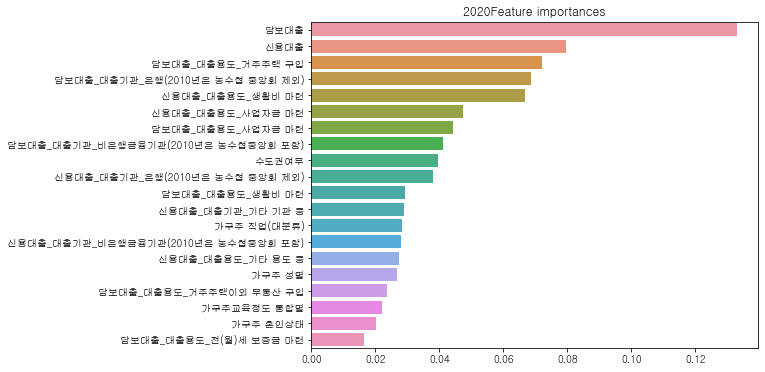

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('2020Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 학습 데이터 분리

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./data/2019가계부채/data_fin.csv', engine='python')
# df=df.drop(columns='Unnamed: 0')
df

,Unnamed: 0,담보대출,담보대출_대출용도_거주주택 구입,담보대출_대출용도_거주주택이외 부동산 구입,담보대출_대출용도_전(월)세 보증금 마련,담보대출_대출용도_부채상환,담보대출_대출용도_사업자금 마련,담보대출_대출용도_생활비 마련,담보대출_대출용도_기타 용도 등,담보대출_대출기관_은행(2010년은 농수협 중앙회 제외),...,신용대출_대출기관_비은행금융기관(2010년은 농수협중앙회 포함),신용대출_대출기관_보험회사,신용대출_대출기관_기타 기관 등,가구주 성별,가구주교육정도 통합별,가구주 혼인상태,입주형태,수도권여부,가구주 직업(대분류),부실가계
0,0,4000.0,0,0.0,4000,0,0.0,0,0.0,4000.0,...,0,0,0,0,1,1,0,1,0,1
1,1,10000.0,10000,0.0,0,0,0.0,0,0.0,10000.0,...,0,0,0,0,0,1,1,1,0,0
2,2,23000.0,23000,0.0,0,0,0.0,0,0.0,23000.0,...,0,0,0,0,1,1,1,1,0,0
3,3,0.0,0,0.0,0,0,0.0,0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
4,4,4520.0,4520,0.0,0,0,0.0,0,0.0,4520.0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,9847,0.0,0,0.0,0,0,0.0,0,0.0,0.0,...,0,0,10000,0,1,1,1,0,0,0
9848,9848,21000.0,0,21000.0,0,0,0.0,0,0.0,21000.0,...,0,0,0,0,1,1,1,0,0,0
9849,9849,3600.0,3600,0.0,0,0,0.0,0,0.0,3600.0,...,0,0,0,0,1,1,1,0,0,0
9850,9850,9200.0,0,0.0,9200,0,0.0,0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X = df.iloc[:,1:-1]
Y = df.iloc[:,-1]

# 학습과 테스트 데이터 셋으로 분리
X_train , X_test , y_train , y_test = train_test_split(X, Y,
                                                       test_size=0.3,  random_state=369)

# GridSearchCV Code

In [168]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score , cross_validate


iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


In [169]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [170]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


# Scaling Code (트리모형은 raw data넣기)
- StandardScaler
- MinMax

In [80]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
X_train

array([[-0.46603027, -0.15008587,  5.66483475, ..., -1.32685148,
         1.36301211, -0.31892648],
       [ 1.00560373, -0.15008587, -0.2419244 , ...,  0.75366385,
        -0.7336692 , -0.31892648],
       [-0.46603027, -0.15008587, -0.2419244 , ...,  0.75366385,
        -0.7336692 , -0.31892648],
       ...,
       [ 1.43025136, -0.15008587, -0.2419244 , ...,  0.75366385,
        -0.7336692 , -0.31892648],
       [-0.46603027, -0.15008587, -0.2419244 , ..., -1.32685148,
         1.36301211, -0.31892648],
       [-0.46603027, -0.15008587, -0.2419244 , ...,  0.75366385,
        -0.7336692 , -0.31892648]])

# SMOTE 이전 모델

In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
# df.info()

In [11]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    91.806845
1     8.193155
Name: 부실가계, dtype: float64
테스트 데이터 레이블 값 비율
0    91.035183
1     8.964817
Name: 부실가계, dtype: float64


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# get_clf_eval 함수로 성능지표들 한눈에 보기

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    
# get_model_train_eval 함수로 모델 학습과 성능지표(get_clf_eval)한번에 해결
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)    

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

# get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, dt_pred)

오차 행렬
[[2512  179]
 [ 231   34]]
정확도: 0.8613, 정밀도: 0.1596, 재현율: 0.1283,    F1: 0.1423, AUC:0.5309


In [79]:
#  하이퍼 파라미터 추출
print('DT 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DT 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 369, 'splitter': 'best'}


In [81]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3,4,5]}

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dt = GridSearchCV(dt_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

# Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dt.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.0198


In [14]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

# get_model_train_eval 함수이용하여 학습 및 평가까지 한번에
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[2619   72]
 [ 253   12]]
정확도: 0.8901, 정밀도: 0.1429, 재현율: 0.0453,    F1: 0.0688, AUC:0.5093


In [308]:
#  하이퍼 파라미터 추출
print('DT 기본 하이퍼 파라미터:\n', lgbm_clf.get_params())

DT 기본 하이퍼 파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'num_leaves': 64, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'boost_from_average': False}


In [313]:
# GridSearchCV

parameters = {'max_depth':[1,2,3,4,5], 'learning_rate':[0.01,0.1]}

grid_dt = GridSearchCV(lgbm_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4}
GridSearchCV 최고 정확도: 0.0475


In [15]:
from sklearn.linear_model import LogisticRegression

# LogisticRegresstion
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

# get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

오차 행렬
[[2667   24]
 [ 258    7]]
정확도: 0.9046, 정밀도: 0.2258, 재현율: 0.0264,    F1: 0.0473, AUC:0.5087


<AxesSubplot:>

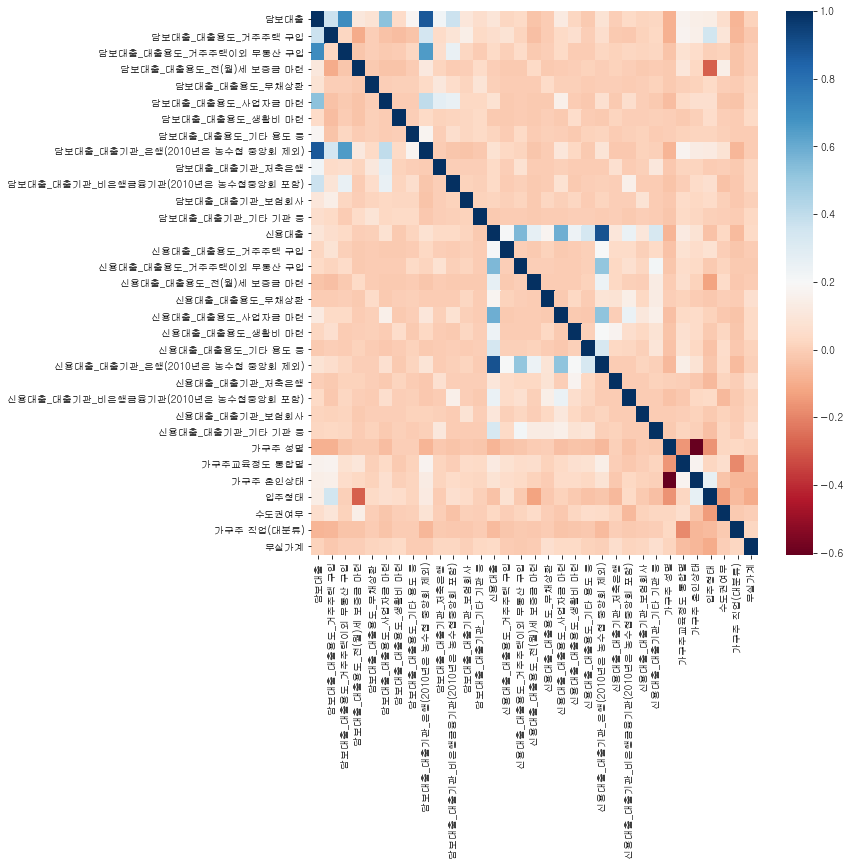

In [26]:
import seaborn as sns

plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, cmap='RdBu')

# SMOTE 이후 모델

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=369)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (6896, 32) (6896,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (12662, 32) (12662,)
SMOTE 적용 후 레이블 값 분포: 
 0    6331
1    6331
Name: 부실가계, dtype: int64


In [18]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

# precision_recall_curve_plot 함수를 통해 정밀도와 재현율 관계 시각화

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

## 결정트리

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369)
get_model_train_eval(dt_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[2170  521]
 [ 188   77]]
정확도: 0.7601, 정밀도: 0.1288, 재현율: 0.2906,    F1: 0.1784, AUC:0.5485


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=369, max_depth=4, min_samples_split=2)
get_model_train_eval(dt_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[2016  675]
 [ 143  122]]
정확도: 0.7233, 정밀도: 0.1531, 재현율: 0.4604,    F1: 0.2298, AUC:0.6048


In [101]:
#  하이퍼 파라미터 추출
print('DT 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DT 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 369, 'splitter': 'best'}


In [102]:
# GridSearchCV
parameters = {'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3,4,5]}

grid_dt = GridSearchCV(dt_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.6535


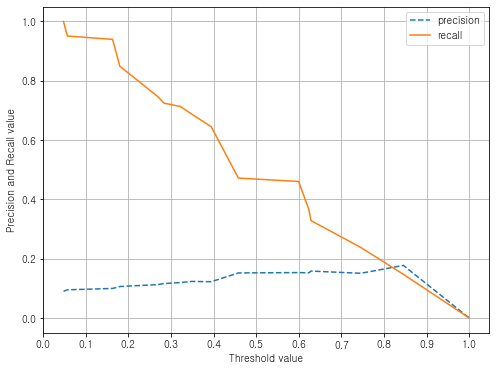

In [21]:
precision_recall_curve_plot( y_test, dt_clf.predict_proba(X_test)[:, 1] )

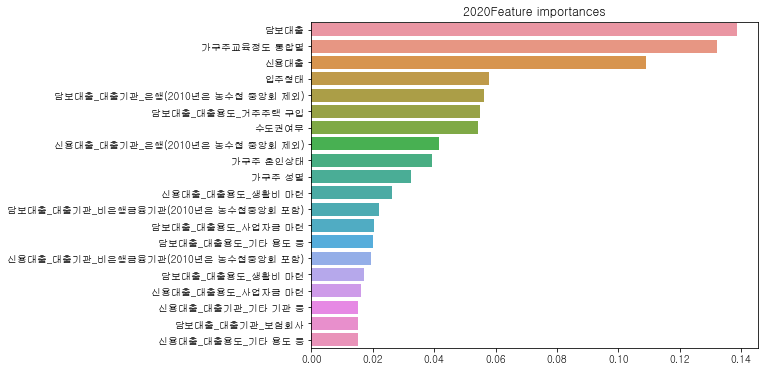

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )


#한글폰트 적용
path = 'C:/Windows/Fonts/gulim.ttc'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('2020Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## LGBM

In [30]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[2323  368]
 [ 203   62]]
정확도: 0.8068, 정밀도: 0.1442, 재현율: 0.2340,    F1: 0.1784, AUC:0.5486


In [27]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, learning_rate= 0.01, max_depth=1)

get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[2088  603]
 [ 149  116]]
정확도: 0.7456, 정밀도: 0.1613, 재현율: 0.4377,    F1: 0.2358, AUC:0.6068


In [350]:
#  하이퍼 파라미터 추출
print('LGBM 기본 하이퍼 파라미터:\n', lgbm_clf.get_params())

LGBM 기본 하이퍼 파라미터:
 {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 1000, 'n_jobs': -1, 'num_leaves': 64, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'boost_from_average': False}


In [73]:
# GridSearchCV

parameters = {'max_depth':[1,2,3,4,5], 'learning_rate':[0.01,0.1]}

grid_dt = GridSearchCV(lgbm_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 5}
GridSearchCV 최고 정확도: 0.8451


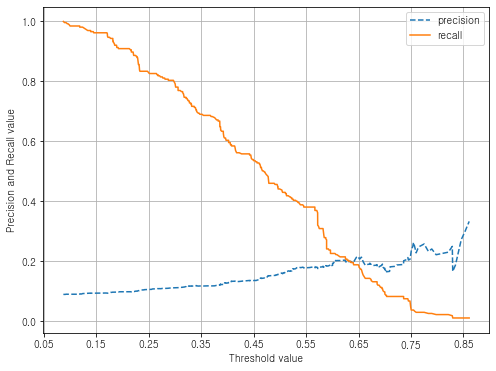

In [28]:
precision_recall_curve_plot( y_test, lgbm_clf.predict_proba(X_test)[:, 1] )

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

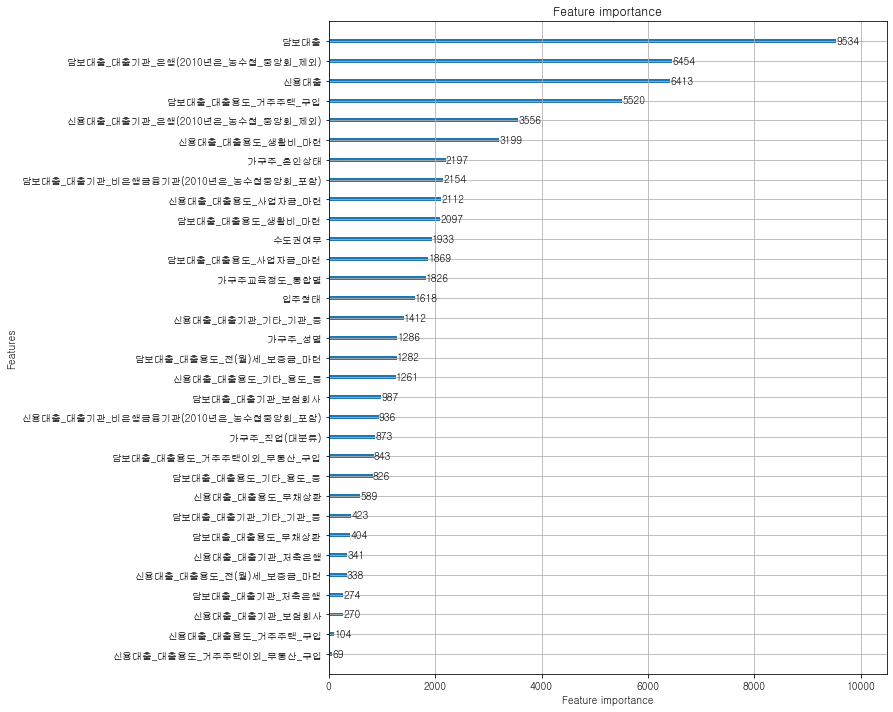

In [31]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plt.title('2020Feature importances')
plot_importance(lgbm_clf, ax=ax)

- 스케일링 필요한 알고리즘 스케일링 종류별 적용해보기

In [32]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)       # fit은 train 피처 값에만(훈련 데이터가 스케일링의 기준값이 된다)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=369)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (6896, 32) (6896,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (12662, 32) (12662,)
SMOTE 적용 후 레이블 값 분포: 
 0    6331
1    6331
Name: 부실가계, dtype: int64


## 로지스틱 회귀

In [35]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[1771  920]
 [ 108  157]]
정확도: 0.6522, 정밀도: 0.1458, 재현율: 0.5925,    F1: 0.2340, AUC:0.6253


In [36]:
lr_clf = LogisticRegression(C=1, penalty='l2')
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[1771  920]
 [ 108  157]]
정확도: 0.6522, 정밀도: 0.1458, 재현율: 0.5925,    F1: 0.2340, AUC:0.6253


In [63]:
#  하이퍼 파라미터 추출
print('로지스티 회귀 기본 하이퍼 파라미터:\n', lr_clf.get_params())

로지스티 회귀 기본 하이퍼 파라미터:
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [64]:
# GridSearchCV

parameters = { "penalty" : ["l2", "l1"], "C" : [0.01, 0.1, 1, 5, 10] }

grid_dt = GridSearchCV(lr_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'penalty': 'l2'}
GridSearchCV 최고 정확도: 0.5739


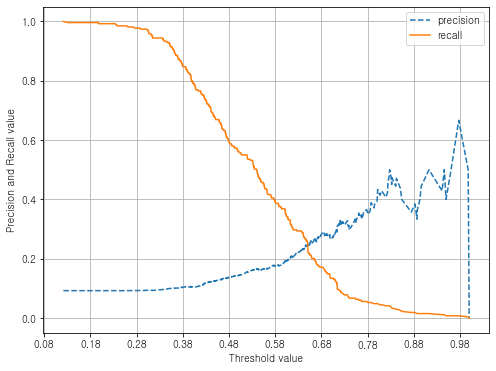

In [418]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

# K-nn

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN 분류기 생성
knn_clf = KNeighborsClassifier(n_neighbors=7)

get_model_train_eval(knn_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[1975  716]
 [ 156  109]]
정확도: 0.7050, 정밀도: 0.1321, 재현율: 0.4113,    F1: 0.2000, AUC:0.5726


In [93]:
#  하이퍼 파라미터 추출
print('KNN 기본 하이퍼 파라미터:\n', knn_clf.get_params())

KNN 기본 하이퍼 파라미터:
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [94]:
# GridSearchCV

parameters = { "n_neighbors" : [3,5,7] }

grid_dt = GridSearchCV(knn_clf, param_grid=parameters, cv=10, scoring='recall', refit=True)

grid_dt.fit(X_train_over, y_train_over)
print('GridSearchCV 최적 파라미터:', grid_dt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dt.best_score_))

GridSearchCV 최적 파라미터: {'n_neighbors': 5}
GridSearchCV 최고 정확도: 0.8587


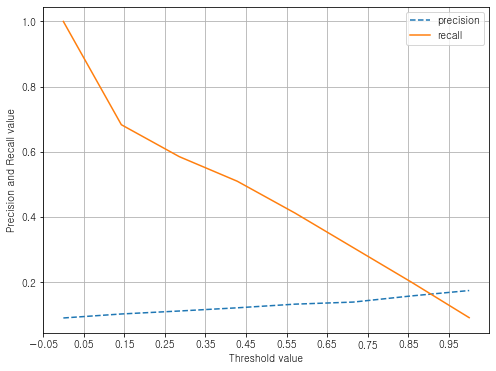

In [38]:
precision_recall_curve_plot( y_test, knn_clf.predict_proba(X_test)[:, 1] )

# SVM

In [39]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
 
svm_clf =svm.SVC(kernel = 'linear')
get_model_train_eval(svm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[1873  818]
 [ 120  145]]
정확도: 0.6827, 정밀도: 0.1506, 재현율: 0.5472,    F1: 0.2362, AUC:0.6216


In [109]:
#  하이퍼 파라미터 추출
print('SVM 기본 하이퍼 파라미터:\n', svm_clf.get_params())

SVM 기본 하이퍼 파라미터:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [110]:
precision_recall_curve_plot( y_test, svm_clf.predict_proba(X_test)[:, 1] )

AttributeError: predict_proba is not available when  probability=False

In [108]:
# SVM, kernel = 'rbf'로 비선형분리 진행
 
svm_clf =svm.SVC(kernel = 'rbf')
get_model_train_eval(svm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[1892  759]
 [ 136  133]]
정확도: 0.6935, 정밀도: 0.1491, 재현율: 0.4944,    F1: 0.2291, AUC:0.6041


In [ ]:
# 교차검증

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

print('교차검증 평균: ', scores.mean())